# Problem

- predict price for 2nd hand car sales

### critical thinking

- price is affected intuitively by _milage_, _year_, _EngineV_ and _brand_. 
    - Sports car (EngineV) are more expensive than economy
    - BMW (brand) is more expensive than toyoto
    - Old cars (year) are less expensive, except vintage cars
    


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [37]:
raw_data = pd.read_csv('dataset/car_sales.csv')

# data['view_map'] = data['view'].map({'No sea view':0, 'Sea view':1}) 

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Pre-processing

### explore descriptive stats

- **missing values**
    - [x] count is different for all, means there is missing values  
    - [x] price (172 items) and EngineV (150 items) hvea missing values. **Total row=4345**. <5%, so we can delete, those rows
    - [x] the aim was predict price. so null price records can be deleted!
- **dummy variables**
    - [x] Brand, Body, Engine Type and Registration are categorical, and have less than 10 **unique** values, means they have potential as **dummy variables**. 
    - [ ] Model has 312 **unique**, hard to generate dummy variables. 
- **information value**
    - [ ] registration\`s **freq** is 3947, means nearly all values are Yes. So it is not useful. Drop it.
    - [ ] a lot of information of model _can be engineered_ from model, year and EngineV. So model is not useful. Drop it. we won\'t loose to much variability
- **outliers**
    - [x] Price 75% of values under 21k, but max value is 300k. That means there are some outliers in **price**. remove the %1 of them
    - [x] Mileage has some outliers
    - [x] EngineV has some outliers, and >6.5 is not a valid value also.
    - [x] Year has outliers b/w 1969 and 2003 !
    

In [38]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### determine variable of interest

In [39]:
data = raw_data.drop(['Model', 'Registration'], axis=1)


### data cleansing - missing values

In [40]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [41]:
data = data.dropna(axis=0)

data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011


### outliers

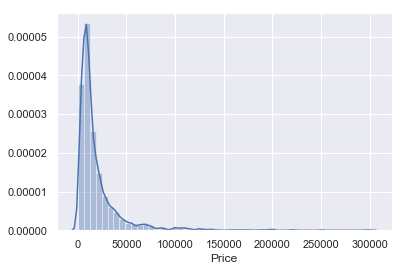

In [42]:
sns.distplot(data['Price'])


In [43]:
# eliminate %1 (%99 quanltile)
q = data['Price'].quantile(0.99)


data_1 = data[data['Price'] < q]

data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


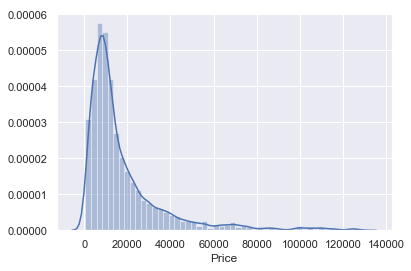

In [44]:
sns.distplot(data_1['Price'])

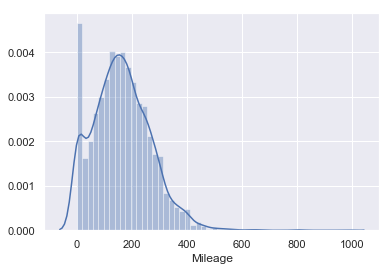

In [45]:
sns.distplot(data['Mileage'])

In [46]:
# eliminate %1 (%99 quanltile)
q = data['Mileage'].quantile(0.99)


data_2 = data_1[data_1['Mileage'] < q]

data_2.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


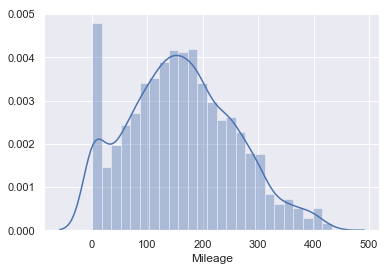

In [47]:
sns.distplot(data_2['Mileage'])

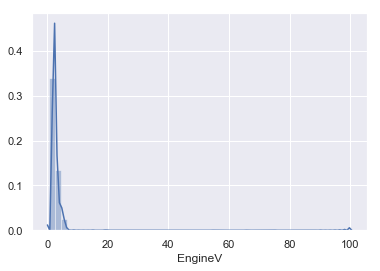

In [48]:
sns.distplot(data['EngineV'])

In [49]:
# eliminate %1 (%99 quanltile)
q = 6.5


data_3 = data_2[data_2['EngineV'] < q]

data_3.describe()

,Price,Mileage,EngineV,Year
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,17991.352031,161.209949,2.443304,2006.409184
std,19043.203478,95.980959,0.946242,6.593734
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


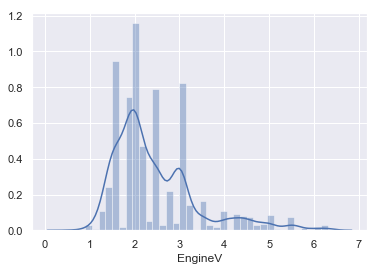

In [50]:
sns.distplot(data_3['EngineV'])

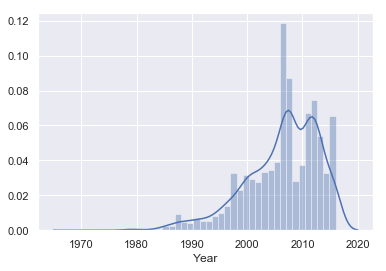

In [51]:
sns.distplot(data['Year'])

In [52]:
# get > %1
q = data['Year'].quantile(0.01)


data_4 = data_3[data_3['Year'] > q]

data_4.describe()

,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


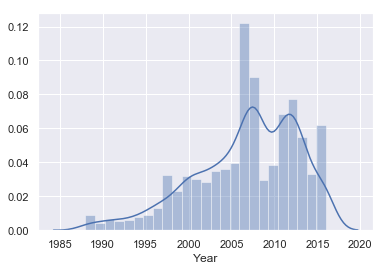

In [53]:
sns.distplot(data_4['Year'])

### end of cleansing

In [54]:
data_cleaned = data_4.reset_index(drop=True)

In [55]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1466,NaN,NaN,1807,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


### checking OLS assumptions 


- [x] **Normality** (CLT guarantees it) and **Zero µ** (Bias or intercept guarantees it)
- [x] **Homoscedasticity** (log transformation provides it)
    - [x] Price dist. is also not normally distributed (even after missing value and %1 of outlier cleansing). So b/w below features, it is expected that less linearity
    - [x] for numerical features vs Price graps shows, there is no linearity. So **we need to transform**
- [x] **Autocorrelation** is not possible in snapshot data. Observations not dependent which comes from different customers' cars esp.
- [x] **Multicollinearity** check variable_inflation_factor. No data is perfect but *Year* > 10 is definitly correlated w/ other variables


### linearity

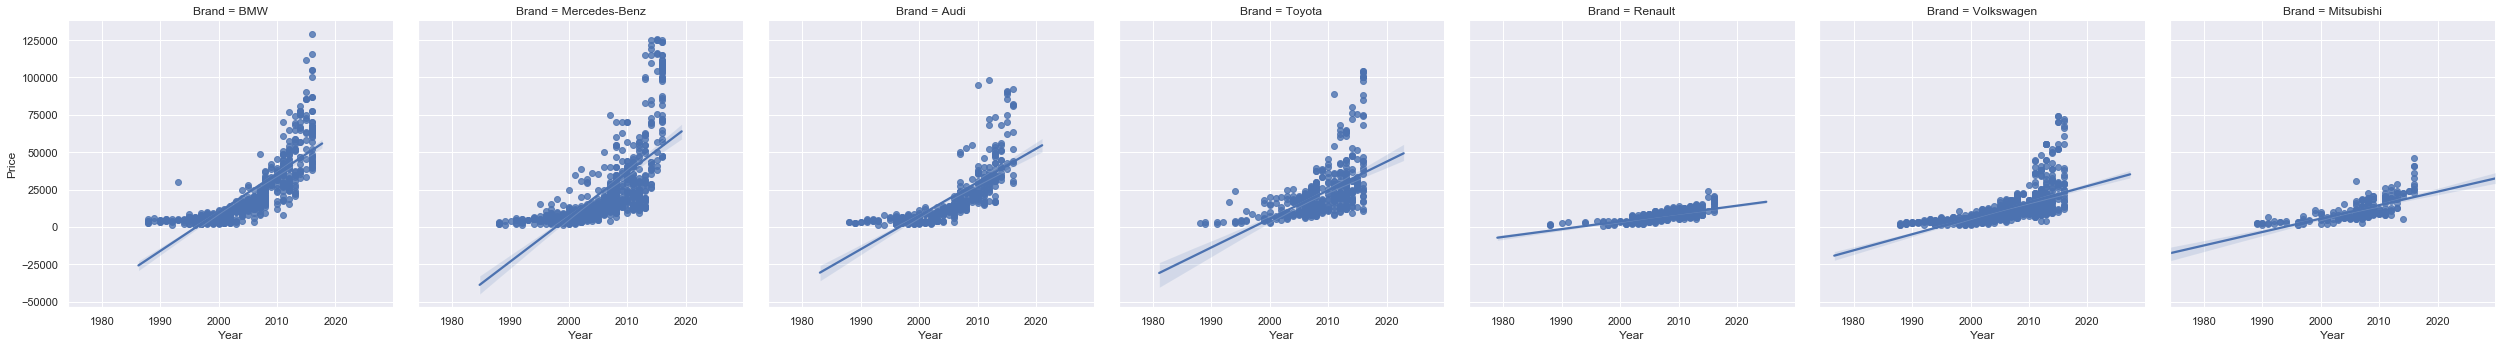

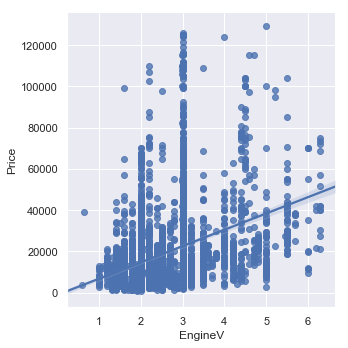

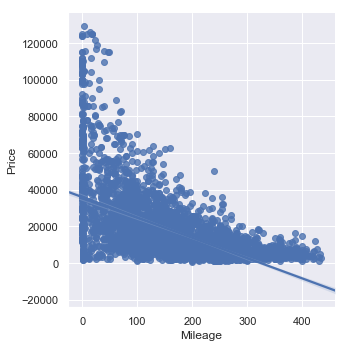

In [56]:
# sns.regplot(x="SAT", y="GPA", data=data);
sns.lmplot(x="Year", y="Price", col='Brand', data=data_cleaned)
sns.lmplot(x="EngineV", y="Price", data=data_cleaned)
sns.lmplot(x="Mileage", y="Price", data=data_cleaned)

### relaxing the assumptions

In [57]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


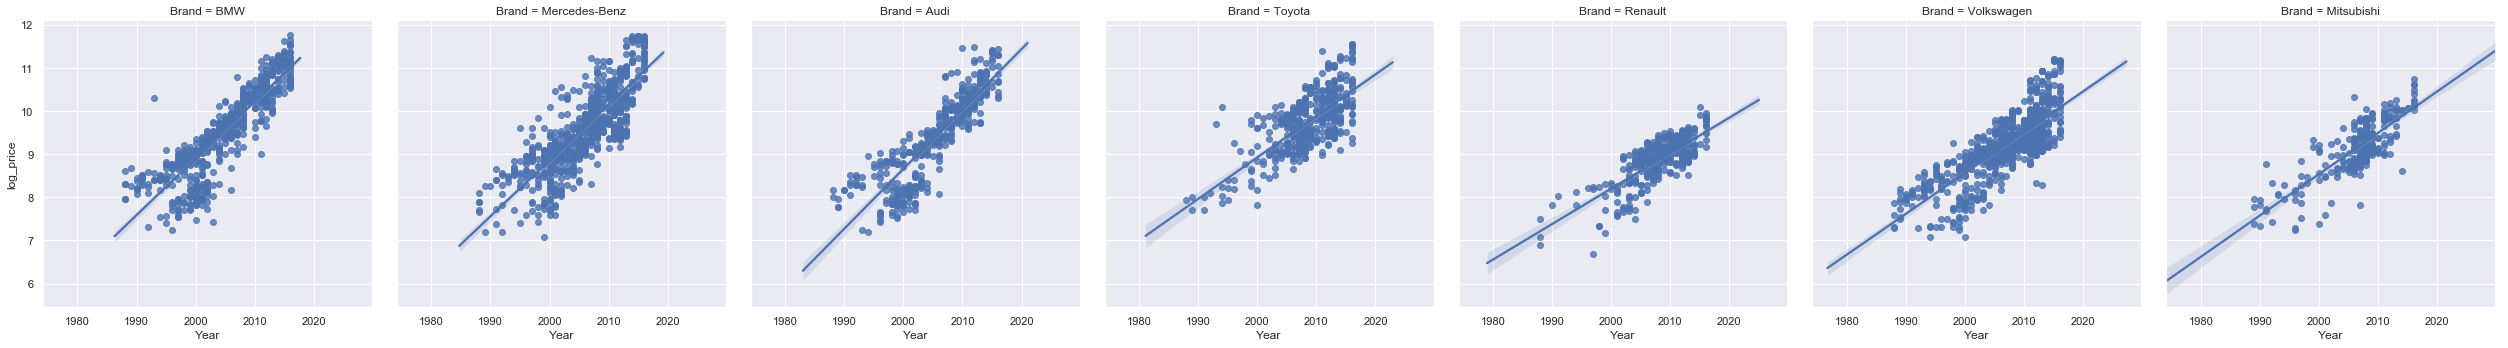

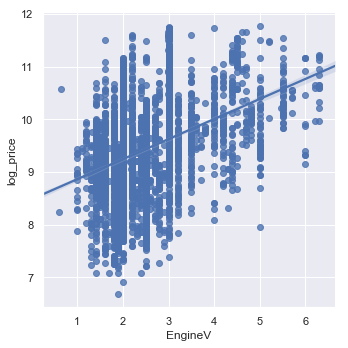

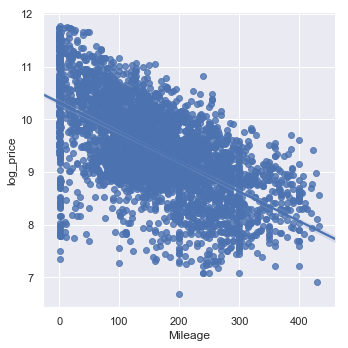

In [58]:
# sns.regplot(x="SAT", y="GPA", data=data);

sns.lmplot(x="Year", y="log_price", col='Brand', data=data_cleaned)
sns.lmplot(x="EngineV", y="log_price", data=data_cleaned)
sns.lmplot(x="Mileage", y="log_price", data=data_cleaned)


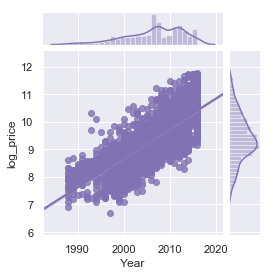

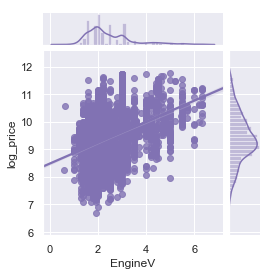

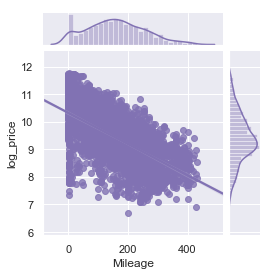

In [59]:
sns.jointplot("Year", "log_price", data=data_cleaned, kind="reg", color="m", height=4)
sns.jointplot("EngineV", "log_price", data=data_cleaned, kind="reg", color="m", height=4)
sns.jointplot("Mileage", "log_price", data=data_cleaned, kind="reg", color="m", height=4)


In [60]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,2011,9.814656


### multicollinearity

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns


In [67]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [63]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


### visualization

# regression

### standardization - _feature scaling_

### regression

# validations